<a href="https://colab.research.google.com/github/NoelRodriguezR/Data-Analysis-Tutorial/blob/main/Covid_19_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Load the dataset
url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
confirmed_cases = pd.read_csv(url)

#Display the first 5 rows
confirmed_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


In [7]:
#Check the shape of the dataset
print(confirmed_cases.shape)

#Check column names
print(confirmed_cases.columns)

#Check for missing values
print(confirmed_cases.isnull().sum())

(289, 1147)
Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '2/28/23', '3/1/23', '3/2/23', '3/3/23', '3/4/23', '3/5/23', '3/6/23',
       '3/7/23', '3/8/23', '3/9/23'],
      dtype='object', length=1147)
Province/State    198
Country/Region      0
Lat                 2
Long                2
1/22/20             0
                 ... 
3/5/23              0
3/6/23              0
3/7/23              0
3/8/23              0
3/9/23              0
Length: 1147, dtype: int64


In [10]:
#Drop unnecessary columns
confirmed_cases = confirmed_cases.drop(columns=['Lat','Long'])

# Melt the dataset to convert it into a long format
confirmed_cases_melted = confirmed_cases.melt(id_vars=['Province/State', 'Country/Region'], var_name ='Date', value_name='Confirmed Cases')

#Convert 'Date' column to datetime format
confirmed_cases_melted['Date']= pd.to_datetime(confirmed_cases_melted['Date'])

#Display the first 5 rows of the cleaned dataset

confirmed_cases_melted.head()

<ipython-input-10-e00dac78d1fc>:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  confirmed_cases_melted['Date']= pd.to_datetime(confirmed_cases_melted['Date'])


,Province/State,Country/Region,Date,Confirmed Cases
0,NaN,Afghanistan,2020-01-22,0
1,NaN,Albania,2020-01-22,0
2,NaN,Algeria,2020-01-22,0
3,NaN,Andorra,2020-01-22,0
4,NaN,Angola,2020-01-22,0


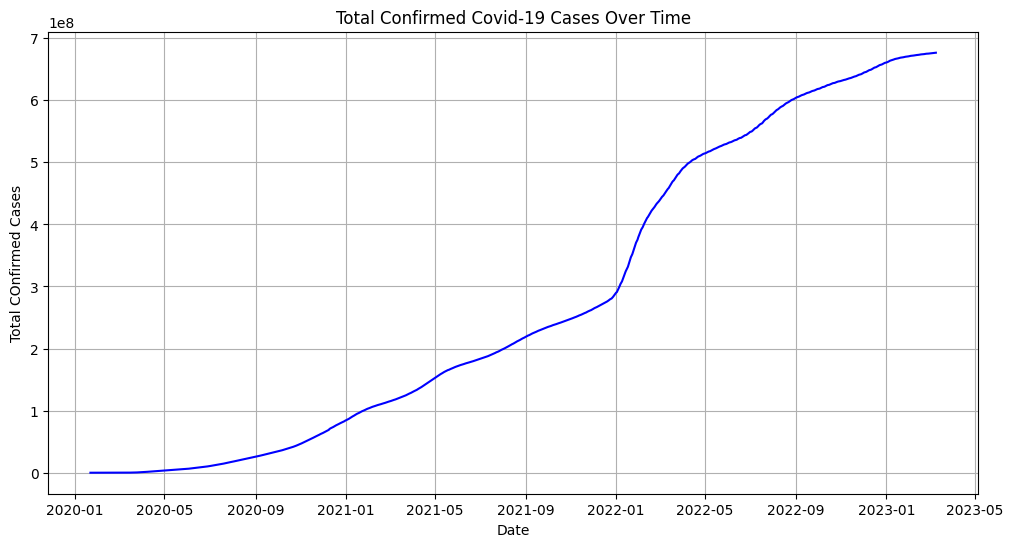

In [11]:
# Group by date and calculate total confirmed cases
total_cases_over_time = confirmed_cases_melted.groupby('Date')['Confirmed Cases'].sum()


# Plot the results
plt.figure(figsize=(12,6))
plt.plot(total_cases_over_time.index, total_cases_over_time.values, color='blue')
plt.title('Total Confirmed Covid-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total COnfirmed Cases')
plt.grid()
plt.show()

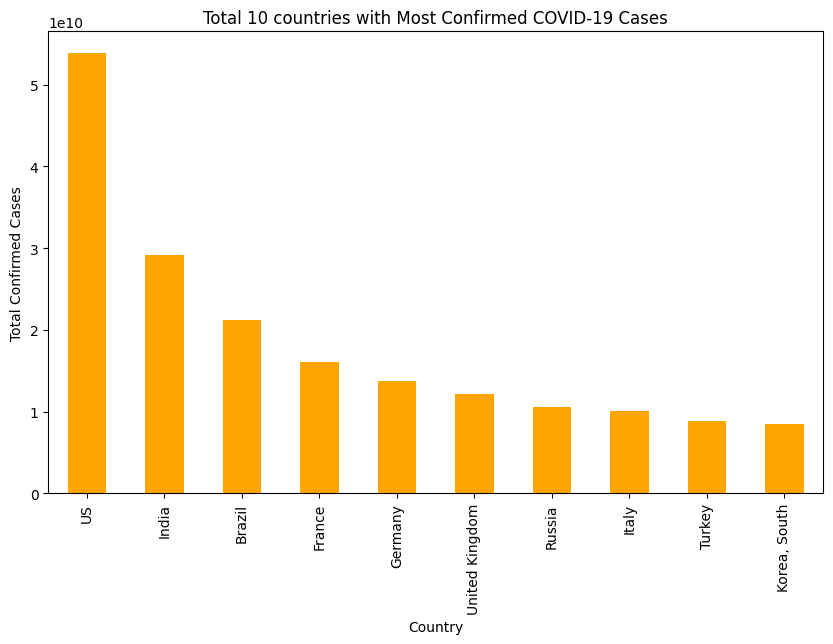

In [12]:
# Group by country and calculate total confirmed cases
total_cases_by_country = confirmed_cases_melted.groupby('Country/Region')['Confirmed Cases'].sum().sort_values(ascending=False).head(10)



# Plot the results

plt.figure(figsize=(10,6))
total_cases_by_country.plot(kind='bar', color='orange')
plt.title('Total 10 countries with Most Confirmed COVID-19 Cases')
plt.xlabel('Country')
plt.ylabel('Total Confirmed Cases')
plt.show()

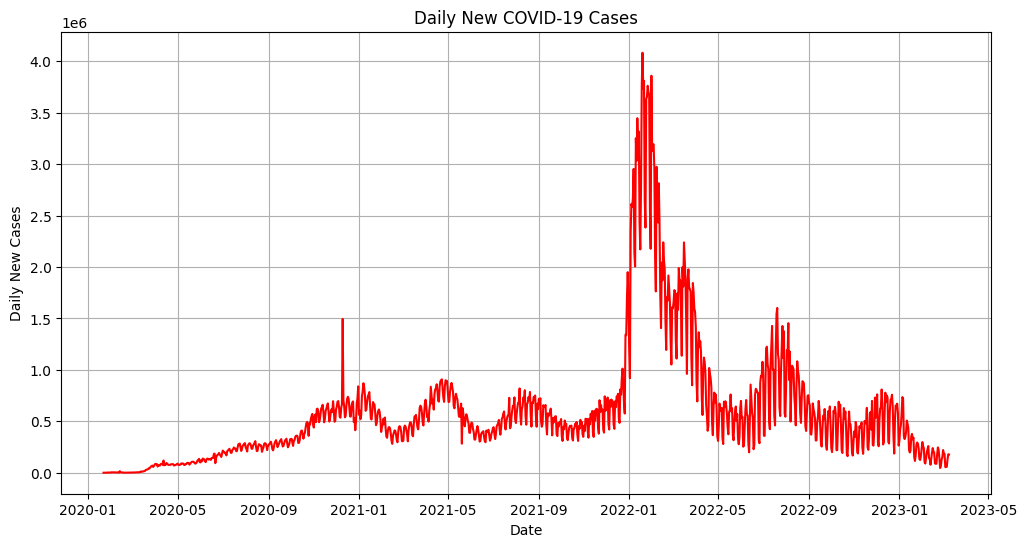

In [14]:
#Calculate daily new cases
daily_new_cases = total_cases_over_time.diff().fillna(0)

#plot the result

plt.figure(figsize=(12,6))
plt.plot(daily_new_cases.index, daily_new_cases.values, color='red')
plt.title('Daily New COVID-19 Cases')
plt.xlabel('Date')
plt.ylabel('Daily New Cases')
plt.grid()
plt.show()